In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/deeks/Desktop/Internships/fv/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/deeks/Desktop/Internships/fv/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [15]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [16]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 6, 6, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 374,724 (1.43 MB)

 Trainable params: 374,724 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 362s 3s/step - accuracy: 0.0294 - loss: 4.2238 - val_accuracy: 0.0541 - val_loss: 3.4384
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.0472 - loss: 3.4937 - val_accuracy: 0.0655 - val_loss: 3.2512
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.0639 - loss: 3.3143 - val_accuracy: 0.1111 - val_loss: 3.0089
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.0827 - loss: 3.1786 - val_accuracy: 0.1709 - val_loss: 2.7764
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.1062 - loss: 3.0231 - val_accuracy: 0.2080 - val_loss: 2.6709
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.1380 - loss: 2.8900 - val_accuracy: 0.2849 - val_loss: 2.4934
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.1563 - loss: 2.8010 - val_accuracy: 0.2650 - val_loss: 2.3166
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.1788 - loss: 2.6888 - val_accuracy: 0.2365 - v

In [19]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.7554 - loss: 0.7973
Training accuracy: 0.7598716020584106


In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 252ms/step - accuracy: 0.8211 - loss: 0.5416
Validation accuracy: 0.8290598392486572


In [21]:
cnn.save('trained_model.h5')

In [22]:
training_history.history #Return Dictionary of history

{'accuracy': [0.029534511268138885,
  0.04911717399954796,
  0.08057785034179688,
  0.08764044940471649,
  0.12102729082107544,
  0.14478330314159393,
  0.16243980824947357,
  0.18780095875263214,
  0.21059389412403107,
  0.2369181364774704,
  0.26677367091178894,
  0.2764045000076294,
  0.28956660628318787,
  0.336757630109787,
  0.33194220066070557,
  0.3531300127506256,
  0.3733547329902649,
  0.40449437499046326,
  0.4035313129425049,
  0.43691813945770264,
  0.45489567518234253,
  0.4703049659729004,
  0.47640448808670044,
  0.5043338537216187,
  0.5248796343803406,
  0.5223113894462585,
  0.5502407550811768,
  0.5579454302787781,
  0.5768860578536987,
  0.6044943928718567,
  0.6000000238418579,
  0.617977499961853],
 'loss': [3.7062630653381348,
  3.4706530570983887,
  3.266765594482422,
  3.1423773765563965,
  2.98420786857605,
  2.866509199142456,
  2.7859818935394287,
  2.6544370651245117,
  2.623929023742676,
  2.5033915042877197,
  2.410823345184326,
  2.33896541595459,
  2.

In [23]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [25]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 82.90598392486572 %


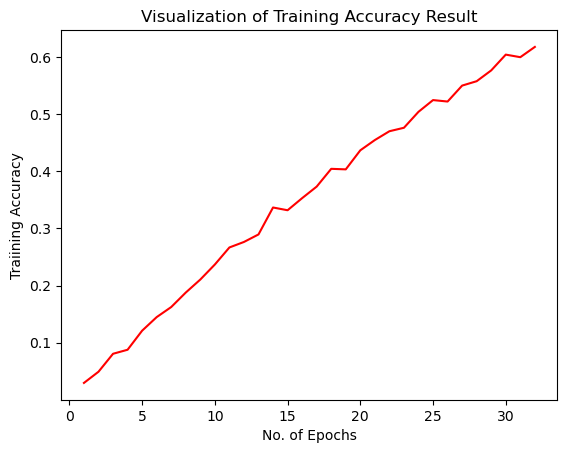

In [26]:
#training_history.history['accuracy']
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

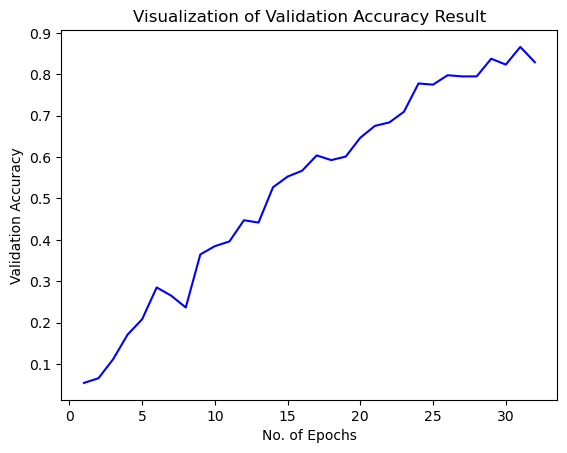

In [27]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/deeks/Desktop/Internships/fv//test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [29]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 482ms/step - accuracy: 0.8273 - loss: 0.5593
Test accuracy: 0.8328690528869629
